# **Uploading Dataset**

Getting the dataset from your personal computer. 

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Dataset1.xls to Dataset1 (1).xls


The dataset being used is the Sweden Auto Insurance Dataset ([Source](https://data.world/anujonthemove/auto-insurance-in-sweden)). 

In the dataset,
X = number of claims, and 
Y = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden.

In [0]:
# importing libraries
import io

import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv(io.BytesIO(uploaded['Dataset1.csv']))



*** No CODEPAGE record, no encoding_override: will use 'ascii'


In case you have the data on your local machine and you do not wish to use Colab, you do not need to run the 1st cell. Ensure that the Jupyter Notebook (IPYNB file) and the excel file are in the same folder or specify the entire address in the code.

The only code that you need to run is given below.

In [0]:
#import pandas as pd
#import numpy as np

#df = pd.read_excel('Dataset1.xls')

# **Initial Analysis**

You can view the entire dataset at once.

In [0]:
df

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


The head() function displays the first 5 observations of the dataframe.

In [0]:
df.head(10)

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


The tail() function displays the last 5 observations of the dataframe.

If an argument(integer) is passed, then it displays the no.  of observations equal to the argument. 

In [0]:
df.tail(10)

,X,Y
53,15,32.1
54,8,55.6
55,29,133.3
56,30,194.5
57,24,137.9
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6
62,26,187.5


Using len() with a dataframe returns the no. of rows in it.

In [0]:
len(df)

63

'shape' is a property  of the dataframe and returns its dimensionality (no. of rows, no. of columns). 

In [0]:
df.shape

(63, 2)

Similarly, 'columns' is another property which returns the column names of the dataframe.

In [0]:
df.columns

Index(['X', 'Y'], dtype='object')

In [0]:
df.columns = ['Var1', "Var2"]

In [0]:
df.columns

Index(['Var1', 'Var2'], dtype='object')

In [0]:
df.index

RangeIndex(start=0, stop=63, step=1)

df.info() presents information about the dataframe. 

* Line 1: The dataframe we are working with has been stored as a * pandas dataframe.
* Line 2: No. of row entries and their index
* Line 3: Column information
* Line 4: Column 'X' has 63 values, no null values and is of integer datatype. 
* Line 5: Column 'Y' has 63 values, no null values and is of float datatype. 
* Line 6: Datatypes present in the dataframe
* Line 7: Memory usage of the dataframe

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
X    63 non-null int64
Y    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


df.describe() generates the descriptive statistics of the dataframe columns.

In [0]:
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


# **Linear Regression**

A simple scatterplot is drawn using Panda's inbuilt functions to get an idea of the relationship between the two variables X and Y.

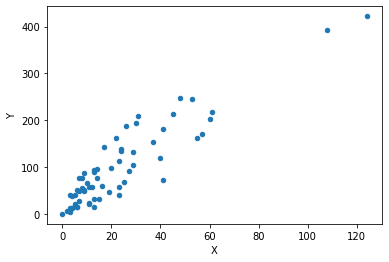

In [0]:
df.plot.scatter(x='X', y='Y')

X and Y seem to share a linear relationship, where as X increases, Y also increases. 

Are the two points in the upper right corner outliers?

Now we move on to finding out how strong is the relationship between them. For this purpose, we use a measure called [correlation coefficient](https://www.kdnuggets.com/2017/02/datascience-introduction-correlation.html). 

-1 -> Perfectly negatively correlated
0 -> Not correlated
1 -> Perfectly positively correlated

Thus, it can be concluded that as no. of claims increases, the total payment for all the claims also increases, which seems to be obvious.

In [0]:
np.corrcoef(df.X, df.Y)

array([[1.        , 0.91287824],
       [0.91287824, 1.        ]])

However, it is not always necessary that there will be a cause-effect relationship between the two variables.

Linear Regression is a method to find the line of best fit that explains the given dataset.

![Least Squares Theory](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png)

Linear regression employs least square theory to minimize the residuals and find the line that explains the data in the best way possible. 

Here, since there are two variables present, the line of best fit is a linear equation with two unknown parameters.

$Y = \alpha + \beta*X$

$\alpha$ and $\beta$ are the unknown parameters to be determined by the method of least squares.



In [0]:
model = np.polyfit(df.X, df.Y, deg=1) # deg=1 because we are looking for a one degree polynomial, i.e., a linear equation.

In [0]:
model

array([ 3.41382356, 19.99448576])

Thus, $\alpha$ = 3.41 and $\beta$ = 19.99

We assign a polynomial with the coeffiecients stored in model to pred, and use it to predict Y values for given X values.

In [0]:
pred = np.poly1d(model)

In [0]:
pred(20)

88.27095696044213